In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies


In [3]:

# GA algorithm placeholder for students to implement their solution
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, population_size=100, num_generations=100, mutation_rate=0.01):
    num_tasks = len(task_durations)
    num_robots = len(robot_efficiencies)

    # Initialize population randomly
    population = np.random.randint(num_robots, size=(population_size, num_tasks))

    for generation in range(num_generations):
        # Calculate fitness for each individual in the population
        fitness_scores = np.array([calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies) for individual in population])

        # Select individuals for crossover
        parents = select_parents(population, fitness_scores)

        # Perform crossover
        offspring = crossover(parents)

        # Perform mutation
        offspring = mutate(offspring, mutation_rate)

        # Create new population for next generation
        population = np.concatenate((parents, offspring))

    # Return the best solution from the final generation
    final_fitness_scores = np.array([calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies) for individual in population])
    best_solution = population[np.argmax(final_fitness_scores)]
    return best_solution

def calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies):
    # Ensure individual contains integer values
    individual = individual.astype(int)

    # Calculate total time for each robot
    total_times = np.array([np.sum(task_durations[individual == robot_idx] / robot_efficiencies[robot_idx]) for robot_idx in range(len(robot_efficiencies))])

    # Calculate total production time and workload balance
    T_total = np.max(total_times)
    B = np.std(total_times)

    # Calculate fitness score (lower is better)
    fitness = T_total + B - np.sum(task_priorities * task_durations[individual])
    return fitness

def select_parents(population, fitness_scores):
    # Select half of the population size as parents
    num_parents = population.shape[0] // 2

    # Perform tournament selection
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        # Select two individuals randomly
        tournament = np.random.choice(population.shape[0], size=2)
        # Select the one with better fitness
        if fitness_scores[tournament[0]] < fitness_scores[tournament[1]]:
            parents[i, :] = population[tournament[0], :]
        else:
            parents[i, :] = population[tournament[1], :]
    return parents

def crossover(parents):
    num_offspring = parents.shape[0]
    num_genes = parents.shape[1]

    # Initialize offspring
    offspring = np.empty((num_offspring, num_genes))

    # Perform single-point crossover
    for i in range(num_offspring):
        # Select two parents randomly
        parent1_idx = i % parents.shape[0]
        parent2_idx = (i+1) % parents.shape[0]

        # Select crossover point randomly
        crossover_point = np.random.randint(num_genes)

        # Create offspring
        offspring[i, :crossover_point] = parents[parent1_idx, :crossover_point]
        offspring[i, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring, mutation_rate):
    # Perform mutation
    for i in range(offspring.shape[0]):
        for j in range(offspring.shape[1]):
            if np.random.rand() < mutation_rate:
                # Mutate gene
                offspring[i, j] = np.random.randint(len(robot_efficiencies))
    return offspring

In [11]:
# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Ensure solution contains integer values
    solution = solution.astype(int)

    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            c = f'P{task_priorities[j]}\n{task_durations[j]}h'  # Display priority and duration in hours on separate lines
            ax.text(j, i, str(c), va='center', ha='center')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

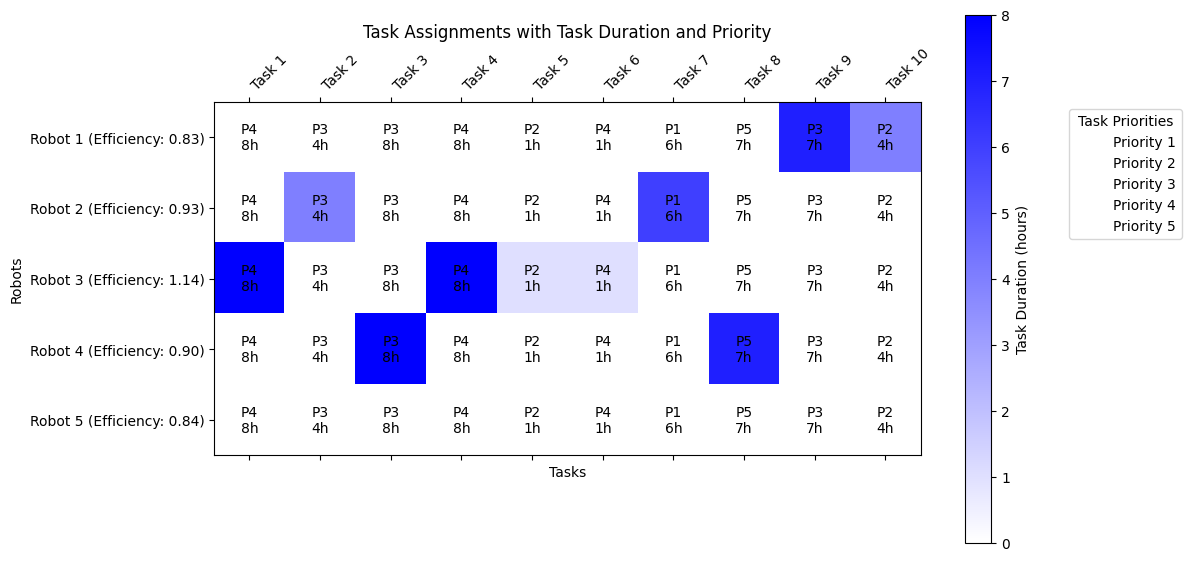

In [13]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
